# Problem Statement

Given a dataset for the gas prices and its related features, predict the petrol consumption by the consumers.

# Import the libraries

In [385]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [386]:
df=pd.read_csv('gas.csv')

In [387]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [388]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

# Visualisations

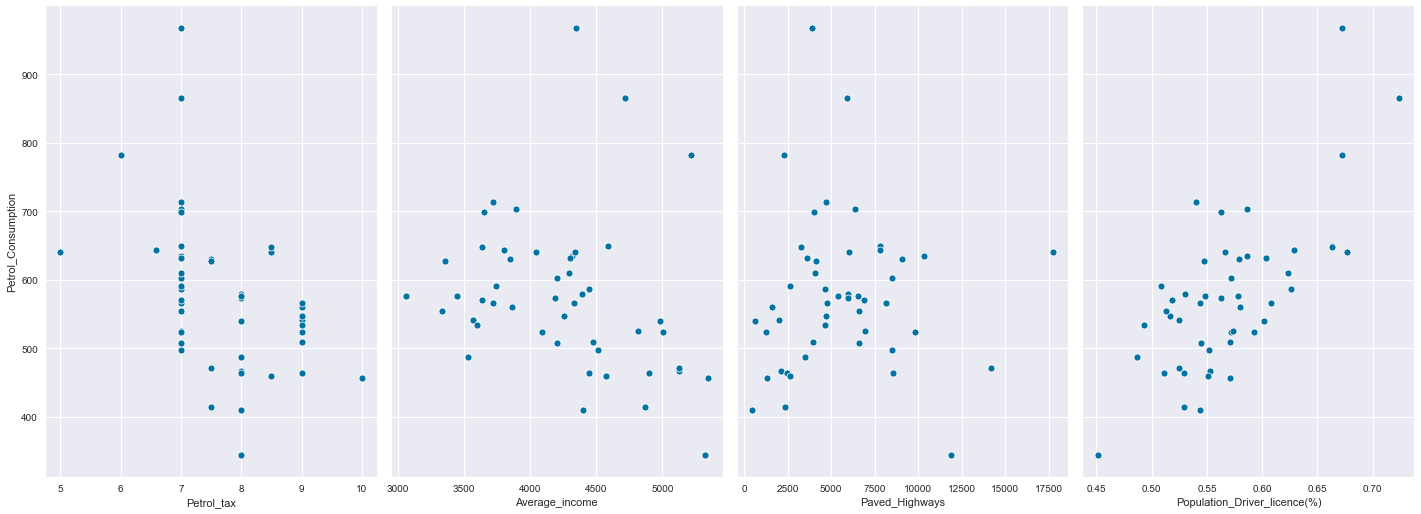

In [389]:
sns.set_style('darkgrid')
sns.pairplot(df,x_vars=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'],y_vars='Petrol_Consumption',height=7,aspect=0.7)

Out of all the features, population of drivers with license have the strong linear relationship with the target variable, petrol consumption.

In [390]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


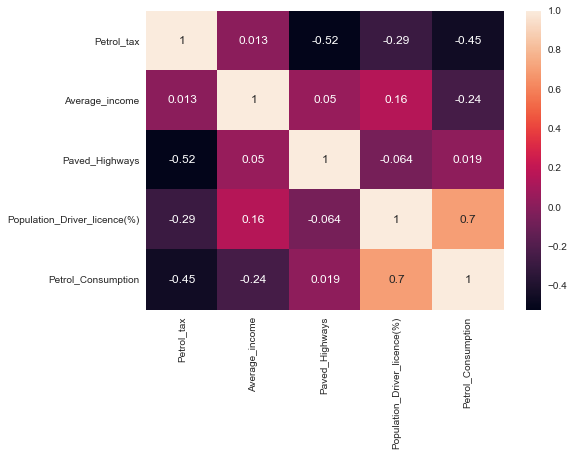

In [391]:
sns.heatmap(df.corr(),annot=True)

The feature, population of drivers with license, has the highest correlation with the target variable.

# Train the model

In [392]:
target=df['Petrol_Consumption']
df=df.drop('Petrol_Consumption',axis=1)

# Linear Regression

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [394]:
# Choosing Population_Driver_licence(%)
X=df.iloc[:,-2:-1]

In [395]:
X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.2)

In [396]:
lr=LinearRegression().fit(X_train,Y_train)

In [397]:
pred=lr.predict(X_test)

## Predictions

In [398]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [399]:
mae=mean_absolute_error(Y_test,pred)
mse=mean_squared_error(Y_test,pred)
r2=r2_score(Y_test,pred)
rmse=np.sqrt(mse)

In [400]:
print('Mean Absolute Error :{}'.format(mae))
print('Mean Squared Error :{}'.format(mse))
print('R^2 score :{}'.format(r2))
print('Root Mean Squared Error :{}'.format(rmse))

Mean Absolute Error :89.84247180256972
Mean Squared Error :13515.089172166952
R^2 score :-0.45673783119057787
Root Mean Squared Error :116.25441571040196


We get a very poor fit with this model as the R^2 is very insignificant.
The errors need to be smaller as well. So, using only one feature (Population_Driver_licence(%)) is a bad choice.

In [401]:
coef=lr.coef_
intercept=lr.intercept_

In [402]:
cols=list(df.columns)
cols

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [403]:
zip_generator=zip(cols,coef)
coeff=list(zip_generator)

In [404]:
print("Coeffiecient's :{}".format(coeff))
print("Intercept :{}".format(intercept))

Coeffiecient's :[('Petrol_tax', -0.0002908428375414982)]
Intercept :591.8913824570769


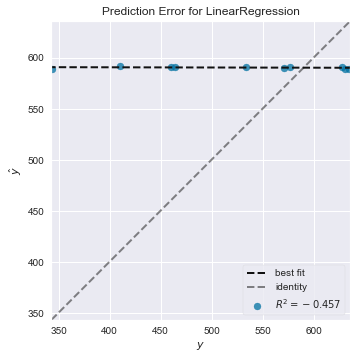

In [405]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lr).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

From the plot above, we can see why the model performs poorly as it overfits the training data.

# Multiple Linear Regression 

In [406]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [407]:
lr=LinearRegression().fit(X_train,Y_train)

In [408]:
pred=lr.predict(X_test)

## Predictions

In [409]:
mae=mean_absolute_error(Y_test,pred)
mse=mean_squared_error(Y_test,pred)
r2=r2_score(Y_test,pred)
rmse=np.sqrt(mse)

In [410]:
print('Mean Absolute Error :{}'.format(mae))
print('Mean Squared Error :{}'.format(mse))
print('R^2 score :{}'.format(r2))
print('Root Mean Squared Error :{}'.format(rmse))

Mean Absolute Error :47.14998966591378
Mean Squared Error :2857.525148247117
R^2 score :0.11756844821658763
Root Mean Squared Error :53.45582426870918


This model produces smaller errors as compared to the linear model. It also has a better R^2 value .

In [411]:
coef=lr.coef_
intercept=lr.intercept_

In [412]:
cols=list(df.columns)
cols

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [413]:
zip_generator=zip(cols,coef)
coeff=list(zip_generator)

In [414]:
print("Coeffiecient's :{}".format(coeff))
print("Intercept :{}".format(intercept))

Coeffiecient's :[('Petrol_tax', -34.95210410575524), ('Average_income', -0.06995645162678435), ('Paved_Highways', -0.0024831639755546753), ('Population_Driver_licence(%)', 1438.1711253927947)]
Intercept :342.6278195944509


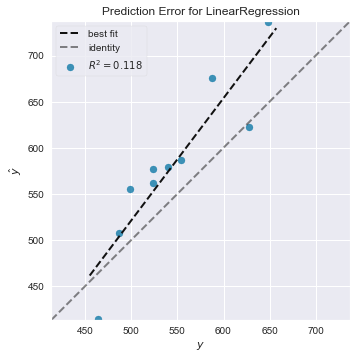

In [415]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lr).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

This model has a much better fit on the data as compared to the previous linear model.

# Ridge Regression

In [416]:
#X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [417]:
from sklearn.linear_model import RidgeCV

In [418]:
ridge=RidgeCV(normalize=True,cv=5).fit(X_train,Y_train)

## Predictions

In [419]:
pred=ridge.predict(X_test)

In [420]:
mae=mean_absolute_error(Y_test,pred)
mse=mean_squared_error(Y_test,pred)
r2=r2_score(Y_test,pred)
rmse=np.sqrt(mse)

In [421]:
print('Mean Absolute Error :{}'.format(mae))
print('Mean Squared Error :{}'.format(mse))
print('R^2 score :{}'.format(r2))
print('Root Mean Squared Error :{}'.format(rmse))

Mean Absolute Error :45.15860113517724
Mean Squared Error :2476.033207320083
R^2 score :0.23537686912641342
Root Mean Squared Error :49.759754896101356


The ridge model performs comparitively very well and gives a good R^2 value.

In [422]:
coef=ridge.coef_
intercept=ridge.intercept_
cols=list(df.columns)
cols

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [423]:
zip_generator=zip(cols,coef)
coeff=list(zip_generator)
print("Coeffiecient's :{}".format(coeff))
print("Intercept :{}".format(intercept))

Coeffiecient's :[('Petrol_tax', -33.889218158263745), ('Average_income', -0.06203801575713336), ('Paved_Highways', -0.0023076530477828985), ('Population_Driver_licence(%)', 1304.6872331303591)]
Intercept :376.0282351192367


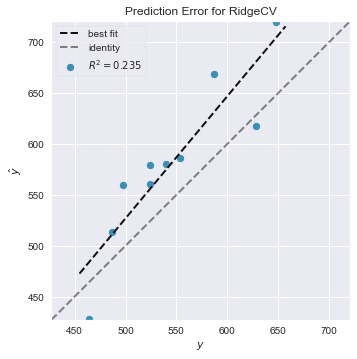

In [424]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(ridge).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

The model has a good job of fitting the data and gives relatively small errors.

# Lasso Regression

In [425]:
#X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [426]:
from sklearn.linear_model import LassoCV

In [427]:
lasso=LassoCV(normalize=True,cv=5).fit(X_train,Y_train)

## Predictions

In [428]:
pred=lasso.predict(X_test)

In [429]:
mae=mean_absolute_error(Y_test,pred)
mse=mean_squared_error(Y_test,pred)
r2=r2_score(Y_test,pred)
rmse=np.sqrt(mse)

In [430]:
print('Mean Absolute Error :{}'.format(mae))
print('Mean Squared Error :{}'.format(mse))
print('R^2 score :{}'.format(r2))
print('Root Mean Squared Error :{}'.format(rmse))

Mean Absolute Error :44.066233833033756
Mean Squared Error :2441.9597356586746
R^2 score :0.24589908849909992
Root Mean Squared Error :49.41618900379383


This model has the best fit among all the models giving the least errors.

In [431]:
coef=lasso.coef_
intercept=lasso.intercept_
cols=list(df.columns)
cols

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [432]:
zip_generator=zip(cols,coef)
coeff=list(zip_generator)
print("Coeffiecient's :{}".format(coeff))
print("Intercept :{}".format(intercept))

Coeffiecient's :[('Petrol_tax', -24.58244069589597), ('Average_income', -0.05578099316532485), ('Paved_Highways', -0.0), ('Population_Driver_licence(%)', 1356.9972962074185)]
Intercept :234.94587922145547


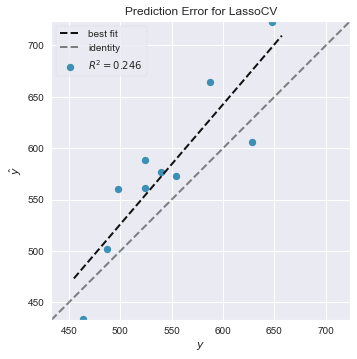

In [433]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lasso).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

Lasso Regression has the best fit among all the models .